# Schrödinger Assignment
Solving the Schrödinger equation for hydrogen atom requires to code for the various mathematical components that constitute the wavefunction. Transfer the codes for required functions you submitted to vocareum corresponding to the weeks in this jupyter notebook.

## Week 2:

Q1: Create two functions to convert degrees to radian and radian to degrees respectively. These functions should take 1 float argument and return the respective conversions each. Round to 5 decimal places. 

Hint: you can use Numpy trigonometric function by doing import numpy as np.

In [1]:
# Code:
import numpy as np
import scipy.constants as c

eps = np.finfo(float).eps

def deg_to_rad(deg):
    return round(deg * (c.pi/180), 5)
  
def rad_to_deg(rad):
    return round(rad * (180/c.pi), 5)

# Test:
# assert statement will throw error if the result is wrong
# no output will be produced for correct results

assert abs(deg_to_rad(90)-1.5708) < eps
assert abs(deg_to_rad(180)-3.14159) < eps
assert abs(deg_to_rad(270)-4.71239) < eps
assert abs(rad_to_deg(3.14)-179.90875) < eps
assert abs(rad_to_deg(3.14/2.0)-89.95437) < eps
assert abs(rad_to_deg(3.14*3/4)-134.93156) < eps


Q2: Create two functions to convert spherical to cartesian coordinates and cartesian to spherical coordinates. These functions should take 3 float arguments and return the 3 respective conversions. Round to 5 decimal places. (Pre-requisite: Part 2b) The convention is shown below.
Hint: You can use Numpy trigonometric function by doing ```import numpy as np```.

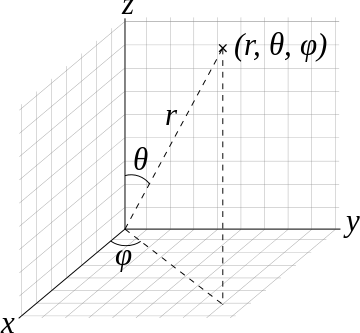

In [2]:
# Code:
def spherical_to_cartesian(r, theta, phi):
    x = r * abs(np.cos(theta)) * abs(np.sin(phi))
    y = r * np.sin(theta) * abs(np.sin(phi))
    z = - r * np.cos(phi)
    return (round(x, 5), round(y, 5), round(z, 5))

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = np.arctan2(y, x)
    phi = np.arccos(z/r)
    return (round(r, 5), round(phi, 5), round(theta, 5))

# Test:
# assert statement will throw error if the result is wrong
# no output will be produced for correct results

assert spherical_to_cartesian(3, 0, np.pi) == (0.0, 0.0, 3.0)
assert spherical_to_cartesian(3, np.pi/2.0, np.pi/2.0) == (0.0, 3.0, 0.0)
assert spherical_to_cartesian(3, np.pi, 0) == (0.0, 0.0, -3.0)
assert cartesian_to_spherical(3, 0, 0) == (3.0, 1.5708, 0.0)
assert cartesian_to_spherical(0, 3, 0) == (3.0, 1.5708, 1.5708)
assert cartesian_to_spherical(0, 0, 3) == (3.0, 0.0, 0.0)
assert cartesian_to_spherical(0, -3, 0) == (3.0, 1.5708, -1.5708)
assert cartesian_to_spherical(0, 0, 3) == (3.0, 0.0, 0.0)


## Week 3:

Q1: Create a function that calculates the normalized angular solution. This function should take 4 float arguments and return the value of the normalized angular solution for the specific m, l, θ and Φ. The return value is a complex number rounded to 5 decimal places for both the real and the imaginary parts. 

Hint: You may want to use ```np.round()``` function to round the return value to 5 decimal places. You can also use ```np.complex()``` to ensure the output is a complex number.

In [3]:
import scipy.special as spec

# Define spherical harmonics:
def Y(m, l, theta, phi):
    return spec.sph_harm(m, l, phi, theta)

# Code for angular wavefunction:
def angular_wave_func(m,l,theta,phi):
    return np.round(np.complex(Y(m, l, theta, phi)), 5)

# Test for angular wavefunction:
# assert statement will throw error if the result is wrong
# no output will be produced for correct results

assert angular_wave_func(0, 0, 0, 0) == (0.28209+0j)
assert angular_wave_func(0, 1, c.pi, 0) == (-0.4886+0j)
assert angular_wave_func(1, 1, c.pi/2, c.pi) == (0.34549-0j)
assert angular_wave_func(0, 2, c.pi, 0) == (0.63078+0j)


Q2: Create a function that calculates the normalized radial solution. This function should take 3 float arguments and return the value of the normalized radial solution for the specific n, l, and r. The return value should be normalized to a^(-3/2), where a is the Bohr's radius, and rounded to 5 decimal places.

Hint: You may want to use ```np.round()``` function to round the return value to 5 decimal places. 

In [4]:
a=c.physical_constants['Bohr radius'][0]

# Define associated Laguerre polynomials for single-electron (Hydrogen atom) system, rescaled to its proper coefficients:
def L(n, l, r, z=1):
    return spec.factorial(2 * l + 1) * (spec.comb(n - l - 1 + 2 * l + 1, n - l - 1)) * (spec.eval_genlaguerre(n - l - 1, 2 * l + 1, (2 * z * r) / (n * a)))

# Code for radial wavefunction:
def radial_wave_func(n, l, r, z=1):
    return np.round((((2 * z) / n) ** 1.5) * (((spec.factorial(n - l - 1))/(2 * n * (spec.factorial(n + l) ** 3))) ** 0.5) * (np.exp(- (z * r) / (n * a))) * (((2 * z * r) / (n * a)) ** l) * L(n, l, r), 5)

# Test for radial wavefunction:
# assert statement will throw error if the result is wrong
# no output will be produced for correct results

assert radial_wave_func(1, 0, a) == 0.73576
assert radial_wave_func(2, 1, a) == 0.12381
assert radial_wave_func(2, 1, 2*a) == 0.15019
assert radial_wave_func(3, 1, 2*a) == 0.08281
assert radial_wave_func(4, 3, 2*a) == 0.00107


## Week 4: 

Q1: Create a function called mgrid that takes in six arguments xstart, xend, xpoints, ystart, yend, ypoints. The first three arguments specifies the starting, ending and the number of points in the x axis. The last three arguments does the same for the y axis. The function should return a list of lists as described in numpy.mgrid when the step length is a complex number. You are not allowed to use numpy.mgrid or any other built-in function in your code, but you are strongly suggested to use numpy.mgrid to test your version of mgrid.

In [5]:
def mgrid2d(xstart, xend, xpoints, ystart, yend, ypoints):
    # Initialize a list to store the grid points that will be returned
    xr=[]
    yr=[]
    
    # Initialize the first x value
    xval = xstart
    
    # Initialize a variable to count the number of x points
    xcount = 0
    
    # Calculate the step size for x and y, replace None with the right expression
    xstep = (xend - xstart) / (xpoints - 1)
    ystep = (yend - ystart) / (ypoints - 1)
    
    while xcount < xpoints:
        # Initialize the first y value, replace None with the right value
        yval = ystart
        
        # Initialize the variable to count the number of y points, replace None with the right value
        ycount = 0
        
        # Initialize temporary lists
        xrow = []
        yrow = []
        
        while ycount < ypoints:
            # Write code to add the current x value to the temporary x list
            xrow.append(xval)
        
            # Write code to add the current y value to the temporary y list
            yrow.append(yval)
        
            # Increase the y value by the step size in y
            yval += ystep
        
            # Increase the counter for the number of y points
            ycount += 1
        
        # Add the temporary x list to the final x list
        xr.append(xrow)
    
        # Add the temporary y list to the final y list
        yr.append(yrow)
    
        # Increase x value by the step size in x
        xval += xstep
    
        # Increase the counter for the number of x points
        xcount += 1
        
    return [xr, yr]

# Test:
# assert statement will throw error if the result is wrong
# no output will be produced for correct results

assert np.shape(mgrid2d(0, 4, 5, 0, 4, 5)) == np.shape(np.mgrid[0:4:5j,0:4:5j])
assert np.allclose(mgrid2d(0, 4, 5, 0, 4, 5), np.mgrid[0:4:5j,0:4:5j])

assert np.shape(mgrid2d(0, 5, 15, 0, 4, 10)) == np.shape(np.mgrid[0:5:15j,0:4:10j])
assert np.allclose(mgrid2d(0, 5, 15, 0, 4, 10), np.mgrid[0:5:15j,0:4:10j])


Q2. Create a function called mgrid that takes in nine arguments, three to specify each x, y, and z axis. The first three input arguments specifies the start (xstart), end (xend), and the number of points (xpoints) in the x axis. Similarly for the y and z axis. The function should return a list of lists as described in numpy.mgrid. You are not allowed to use numpy.mgrid or any other built-in function. 

However, you can use numpy.mgrid to test your own function and compare the result.

In [6]:
def mgrid3d(xstart, xend, xpoints, 
            ystart, yend, ypoints, 
            zstart, zend, zpoints):
    xr = []
    yr = []
    zr = []
    xval = xstart
    xcount = 0

    # Calculate the step size for each axis
    xstep = (xend - xstart) / (xpoints - 1)
    ystep = (yend - ystart) / (ypoints - 1)
    zstep = (zend - zstart) / (zpoints - 1)
    
    while xcount < xpoints:
        # Initialize y points
        # Create temporary variable to store x, y and z list
        yval = ystart
        ycount = 0
        xro = []
        yro = []
        zro = []
    
        while ycount < ypoints:
            # Initialize z points
            # Create temporary variable to store the inner x, y, and z list
            zval = zstart
            zcount = 0
            xrow = []
            yrow = []
            zrow = []
        
            while zcount < zpoints:
                # Add the points x, y, and z to the inner most list
                xrow.append(xval)
                yrow.append(yval)
                zrow.append(zval)
                zval += zstep
            
                # Increase z point
                zcount += 1
                
            # Add the inner most lists to the second lists
            xro.append(xrow)
            yro.append(yrow)
            zro.append(zrow)
            yval += ystep
    
            # Increase y point
            ycount += 1
            
        # Add the second lists to the returned lists
        xr.append(xro)
        yr.append(yro)
        zr.append(zro)
        xval += xstep
    
        # Increase x point
        xcount += 1
        
    return [xr, yr, zr]

# Test:
# assert statement will throw error if the result is wrong
# no output will be produced for correct results

assert np.shape(mgrid3d(0, 4, 5, 0, 4, 5, 0, 4, 5)) == np.shape(np.mgrid[0:4:5j,0:4:5j,0:4:5j])
assert np.allclose(mgrid3d(0, 4, 5, 0, 4, 5, 0, 4, 5), np.mgrid[0:4:5j,0:4:5j,0:4:5j])

assert np.shape(mgrid3d(0, 5, 15, 0, 4, 10, 1, 2, 3)) == np.shape(np.mgrid[0:5:15j,0:4:10j,1:2:3j])
assert np.allclose(mgrid3d(0, 5, 15, 0, 4, 10, 1, 2, 3), np.mgrid[0:5:15j,0:4:10j,1:2:3j])


## Week 5:

Q1. Create a function that calculates the square of the magnitude of the real wave function. The function takes in several arguments:
* ```n```: quantum number n
* ```l```: quantum number l
* ```m```: quantum number m
* ```roa```: maximum distance to plot from the centre, normalized to Bohr radius, i.e. r/a.
* ```Nx```: Number of points in the x axis.
* ```Ny```: Number of points in the y axis.
* ```Nz```: Number of points in the z axis.

The function should return:
* ```xx```: x location of all the points in a 3D Numpy array.
* ```yy```: y location of all the points in a 3D Numpy array.
* ```zz```: z location of all the points in a 3D Numpy array.
* ```density```: The square of the magnitude of the real wave function, i.e. |Ψ|^2

To obtain the real wave function from complex parts, i.e. m != 0:

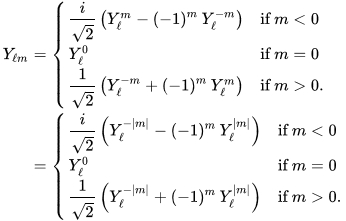

Hint: You may find the following functions to be useful:
* ```fvec=numpy.vectorize(f)```: This function takes in a function and return its vectorized version of the function.

* ```m=mag(c)```: This function takes in a complex number and returns its absolute value or its magnitude. Use your own function rather than numpy's built-in function.

* ```ar=numpy.array(x)```: This function takes in a list and returns a numpy array. Numpy array is faster to process than Python's list.
* ```numpy.absolute(x)```: This function returns the absolute value of x.

Hint: You will need to use all the previous functions you have done. Note that some of those functions may round the output to 5 decimal places and the final magnitude output from this function should also be rounded to 5 decimal places.

In [7]:
###Code:
def hydrogen_wave_func(n,l,m,roa,Nx,Ny,Nz):
    
    # Get cartesian points
    [xx, yy, zz] = mgrid3d(-roa, roa, Nx, -roa, roa, Ny, -roa, roa, Nz)

    # Convert to spherical coordinates
    vfunc = np.vectorize(cartesian_to_spherical)
    r, theta, phi = vfunc(xx, yy, zz)
    
    actual_r = r * a
    
    radial = np.vectorize(radial_wave_func)
    angular = np.vectorize(angular_wave_func)
    
    if m == 0:
        density = np.absolute(radial(n, l, actual_r) * angular(m, l, theta, phi)) ** 2
        
    elif m > 0:
        lin_comb = (1/np.sqrt(2)) * radial(n, l, actual_r) * (angular(-m, l, theta, phi) + ((-1) ** m) * (angular(m, l, theta, phi)))
        if m % 2 == 0:
            density = np.absolute(lin_comb) ** 2
        else:
            density = np.absolute(lin_comb.real) ** 2
    
    elif m < 0:
        lin_comb = (1j/np.sqrt(2)) * radial(n, l, actual_r) * (angular(m, l, theta, phi) - ((-1) ** m) * (angular(-m, l, theta, phi)))
        if m % 2 == 0:
            density = np.absolute(lin_comb) ** 2
        else:
            density = np.absolute(lin_comb.real) ** 2
    
    return np.round(np.array(xx), 5), np.round(np.array(yy), 5), np.round(np.array(zz), 5), np.round(density, 5)

###Test:
print('Test 1')
x,y,z,mag = hydrogen_wave_func(2, 1, 1, 8, 2, 2, 2)
print('x, y, z:')
print(x, y, z)
print('mag:')
print(mag)

print('\n')
print('Test 2')
x,y,z,mag = hydrogen_wave_func(2, 1, 1, 5, 3, 4, 2)
print('x, y, z:')
print(x, y, z)
print('mag:')
print(mag)

print('\n')
print('Test 3')
x,y,z,mag = hydrogen_wave_func(2, 0, 0, 3, 5, 4, 3)
print('x, y, z:')
print(x, y, z)
print('mag:')
print(mag)

Test 1
x, y, z:
[[[-8. -8.]
  [-8. -8.]]

 [[ 8.  8.]
  [ 8.  8.]]] [[[-8. -8.]
  [ 8.  8.]]

 [[-8. -8.]
  [ 8.  8.]]] [[[-8.  8.]
  [-8.  8.]]

 [[-8.  8.]
  [-8.  8.]]]
mag:
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


Test 2
x, y, z:
[[[-5. -5.]
  [-5. -5.]
  [-5. -5.]
  [-5. -5.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 5.  5.]
  [ 5.  5.]
  [ 5.  5.]
  [ 5.  5.]]] [[[-5.      -5.     ]
  [-1.66667 -1.66667]
  [ 1.66667  1.66667]
  [ 5.       5.     ]]

 [[-5.      -5.     ]
  [-1.66667 -1.66667]
  [ 1.66667  1.66667]
  [ 5.       5.     ]]

 [[-5.      -5.     ]
  [-1.66667 -1.66667]
  [ 1.66667  1.66667]
  [ 5.       5.     ]]] [[[-5.  5.]
  [-5.  5.]
  [-5.  5.]
  [-5.  5.]]

 [[-5.  5.]
  [-5.  5.]
  [-5.  5.]
  [-5.  5.]]

 [[-5.  5.]
  [-5.  5.]
  [-5.  5.]
  [-5.  5.]]]
mag:
[[[4.0e-05 4.0e-05]
  [1.7e-04 1.7e-04]
  [1.7e-04 1.7e-04]
  [4.0e-05 4.0e-05]]

 [[0.0e+00 0.0e+00]
  [0.0e+00 0.0e+00]
  [0.0e+00 0.0e+00]
  [0.0e+00 0.0e+00]]

 [[4.0e-05 4.0e-05]
  

Expected Output:

Test 1

x, y, z:

[[[-8. -8.]

  [-8. -8.]]

 [[ 8.  8.]
 
  [ 8.  8.]]] [[[-8. -8.]
  
  [ 8.  8.]]

 [[-8. -8.]
 
  [ 8.  8.]]] [[[-8.  8.]
  
  [-8.  8.]]

 [[-8.  8.]
 
  [-8.  8.]]]
  
mag:

[[[ 0.  0.]

  [ 0.  0.]]

 [[ 0.  0.]
 
  [ 0.  0.]]]


Test 2

x, y, z:

[[[-5. -5.]

  [-5. -5.]
  
  [-5. -5.]
  
  [-5. -5.]]

 [[ 0.  0.]
 
  [ 0.  0.]
  
  [ 0.  0.]
  
  [ 0.  0.]]

 [[ 5.  5.]
 
  [ 5.  5.]
  
  [ 5.  5.]
  
  [ 5.  5.]]] [[[-5.      -5.     ]
  
  [-1.66667 -1.66667]
  
  [ 1.66667  1.66667]
  
  [ 5.       5.     ]]

 [[-5.      -5.     ]
 
  [-1.66667 -1.66667]
  
  [ 1.66667  1.66667]
  
  [ 5.       5.     ]]

 [[-5.      -5.     ]
 
  [-1.66667 -1.66667]
  
  [ 1.66667  1.66667]
  
  [ 5.       5.     ]]] [[[-5.  5.]
  
  [-5.  5.]
  
  [-5.  5.]
  
  [-5.  5.]]

 [[-5.  5.]
 
  [-5.  5.]
  
  [-5.  5.]
  
  [-5.  5.]]

 [[-5.  5.]
 
  [-5.  5.]
  
  [-5.  5.]
  
  [-5.  5.]]]
  
mag:

[[[  4.00000000e-05   4.00000000e-05]

  [  1.70000000e-04   1.70000000e-04]
  
  [  1.70000000e-04   1.70000000e-04]
  
  [  4.00000000e-05   4.00000000e-05]]

 [[  0.00000000e+00   0.00000000e+00]
 
  [  0.00000000e+00   0.00000000e+00]
  
  [  0.00000000e+00   0.00000000e+00]
  
  [  0.00000000e+00   0.00000000e+00]]

 [[  4.00000000e-05   4.00000000e-05]
 
  [  1.70000000e-04   1.70000000e-04]
  
  [  1.70000000e-04   1.70000000e-04]
  
  [  4.00000000e-05   4.00000000e-05]]]


Test 3

x, y, z:

[[[-3.  -3.  -3. ]

  [-3.  -3.  -3. ]
  
  [-3.  -3.  -3. ]
  
  [-3.  -3.  -3. ]]

 [[-1.5 -1.5 -1.5]
 
  [-1.5 -1.5 -1.5]
  
  [-1.5 -1.5 -1.5]
  
  [-1.5 -1.5 -1.5]]

 [[ 0.   0.   0. ]
 
  [ 0.   0.   0. ]
  
  [ 0.   0.   0. ]
  
  [ 0.   0.   0. ]]

 [[ 1.5  1.5  1.5]
 
  [ 1.5  1.5  1.5]
  
  [ 1.5  1.5  1.5]
  
  [ 1.5  1.5  1.5]]

 [[ 3.   3.   3. ]
 
  [ 3.   3.   3. ]
  
  [ 3.   3.   3. ]
  
  [ 3.   3.   3. ]]] [[[-3. -3. -3.]
  
  [-1. -1. -1.]
  
  [ 1.  1.  1.]
  
  [ 3.  3.  3.]]

 [[-3. -3. -3.]
 
  [-1. -1. -1.]
  
  [ 1.  1.  1.]
  
  [ 3.  3.  3.]]

 [[-3. -3. -3.]
 
  [-1. -1. -1.]
  
  [ 1.  1.  1.]
  
  [ 3.  3.  3.]]

 [[-3. -3. -3.]
 
  [-1. -1. -1.]
  
  [ 1.  1.  1.]
  
  [ 3.  3.  3.]]

 [[-3. -3. -3.]
 
  [-1. -1. -1.]
  
  [ 1.  1.  1.]
  
  [ 3.  3.  3.]]] [[[-3.  0.  3.]
  
  [-3.  0.  3.]
  
  [-3.  0.  3.]
  
  [-3.  0.  3.]]

 [[-3.  0.  3.]
 
  [-3.  0.  3.]
  
  [-3.  0.  3.]
  
  [-3.  0.  3.]]

 [[-3.  0.  3.]
 
  [-3.  0.  3.]
  
  [-3.  0.  3.]
  
  [-3.  0.  3.]]

 [[-3.  0.  3.]
 
  [-3.  0.  3.]
  
  [-3.  0.  3.]
  
  [-3.  0.  3.]]

 [[-3.  0.  3.]
 
  [-3.  0.  3.]
  
  [-3.  0.  3.]
  
  [-3.  0.  3.]]]
  
mag:

[[[  5.60000000e-04   7.20000000e-04   5.60000000e-04]

  [  7.10000000e-04   5.70000000e-04   7.10000000e-04]
  
  [  7.10000000e-04   5.70000000e-04   7.10000000e-04]
  
  [  5.60000000e-04   7.20000000e-04   5.60000000e-04]]

 [[  6.90000000e-04   6.40000000e-04   6.90000000e-04]
 
  [  6.80000000e-04   6.00000000e-05   6.80000000e-04]
  
  [  6.80000000e-04   6.00000000e-05   6.80000000e-04]
  
  [  6.90000000e-04   6.40000000e-04   6.90000000e-04]]
  

 [[  7.20000000e-04   5.00000000e-04   7.20000000e-04]
 
  [  5.70000000e-04   3.66000000e-03   5.70000000e-04]
  
  [  5.70000000e-04   3.66000000e-03   5.70000000e-04]
  
  [  7.20000000e-04   5.00000000e-04   7.20000000e-04]]

 [[  6.90000000e-04   6.40000000e-04   6.90000000e-04]
 
  [  6.80000000e-04   6.00000000e-05   6.80000000e-04]
  
  [  6.80000000e-04   6.00000000e-05   6.80000000e-04]
  
  [  6.90000000e-04   6.40000000e-04   6.90000000e-04]]

 [[  5.60000000e-04   7.20000000e-04   5.60000000e-04]
 
  [  7.10000000e-04   5.70000000e-04   7.10000000e-04]
  
  [  7.10000000e-04   5.70000000e-04   7.10000000e-04]
  
  [  5.60000000e-04   7.20000000e-04   5.60000000e-04]]]

## Week 9: 

Use Mayavi to plot the real orbitals of your assigned hydrogen function. The real orbitals will be a linear combination of your complex wave functions.

In [9]:
# Code to save the data to a file so that 
# you don't have to keep on computing it:

def generate_nlm(n):
    return [[n, l, m] for l in range(n) for m in range(-l, l+1)]

# Choose n = 4
nlm = generate_nlm(4)
for nlm_values in nlm:
    x, y, z, mag = hydrogen_wave_func(*nlm_values,40,100,100,100)
    print('x, y, z: ')
    print(x, y, z)
    print('mag: ')
    print(mag)
    print(x, y, z, mag)
    x.dump(f'{nlm_values[0]}{nlm_values[1]}{nlm_values[2]}_x_test.dat')
    y.dump(f'{nlm_values[0]}{nlm_values[1]}{nlm_values[2]}_y_test.dat')
    z.dump(f'{nlm_values[0]}{nlm_values[1]}{nlm_values[2]}_z_test.dat')
    mag.dump(f'{nlm_values[0]}{nlm_values[1]}{nlm_values[2]}_den_test.dat')

Test
x, y, z: 
[[[-40.      -40.      -40.      ... -40.      -40.      -40.     ]
  [-40.      -40.      -40.      ... -40.      -40.      -40.     ]
  [-40.      -40.      -40.      ... -40.      -40.      -40.     ]
  ...
  [-40.      -40.      -40.      ... -40.      -40.      -40.     ]
  [-40.      -40.      -40.      ... -40.      -40.      -40.     ]
  [-40.      -40.      -40.      ... -40.      -40.      -40.     ]]

 [[-39.19192 -39.19192 -39.19192 ... -39.19192 -39.19192 -39.19192]
  [-39.19192 -39.19192 -39.19192 ... -39.19192 -39.19192 -39.19192]
  [-39.19192 -39.19192 -39.19192 ... -39.19192 -39.19192 -39.19192]
  ...
  [-39.19192 -39.19192 -39.19192 ... -39.19192 -39.19192 -39.19192]
  [-39.19192 -39.19192 -39.19192 ... -39.19192 -39.19192 -39.19192]
  [-39.19192 -39.19192 -39.19192 ... -39.19192 -39.19192 -39.19192]]

 [[-38.38384 -38.38384 -38.38384 ... -38.38384 -38.38384 -38.38384]
  [-38.38384 -38.38384 -38.38384 ... -38.38384 -38.38384 -38.38384]
  [-38.38384 -38.

In [8]:
# Mayavi code:

from mayavi import mlab

def plot_volume(n, l, m):
    mu, sigma = 0, 0.1
    x = np.load(f'{n}{l}{m}_x_test.dat', allow_pickle=True)
    y = np.load(f'{n}{l}{m}_y_test.dat', allow_pickle=True)
    z = np.load(f'{n}{l}{m}_z_test.dat', allow_pickle=True)

    density = np.load(f'{n}{l}{m}_den_test.dat', allow_pickle=True)
    figure = mlab.figure('DensityPlot')
    pts = mlab.contour3d(density,contours=40,opacity=0.4)
    mlab.axes()
    mlab.show()

In [9]:
###Volume slicer code:
import numpy as np

from traits.api import HasTraits, Instance, Array, \
    on_trait_change
from traitsui.api import View, Item, HGroup, Group

from tvtk.api import tvtk
from tvtk.pyface.scene import Scene

from mayavi import mlab
from mayavi.core.api import PipelineBase, Source
from mayavi.core.ui.api import SceneEditor, MayaviScene, \
                                MlabSceneModel

################################################################################
# Create some data
def plot_slicer(n, l, m):
    data = np.load(f'{n}{l}{m}_den_test.dat', allow_pickle=True)

    ################################################################################
    # The object implementing the dialog
    class VolumeSlicer(HasTraits):
        # The data to plot
        data = Array()

        # The 4 views displayed
        scene3d = Instance(MlabSceneModel, ())
        scene_x = Instance(MlabSceneModel, ())
        scene_y = Instance(MlabSceneModel, ())
        scene_z = Instance(MlabSceneModel, ())

        # The data source
        data_src3d = Instance(Source)

        # The image plane widgets of the 3D scene
        ipw_3d_x = Instance(PipelineBase)
        ipw_3d_y = Instance(PipelineBase)
        ipw_3d_z = Instance(PipelineBase)

        _axis_names = dict(x=0, y=1, z=2)


        #---------------------------------------------------------------------------
        def __init__(self, **traits):
            super(VolumeSlicer, self).__init__(**traits)
            # Force the creation of the image_plane_widgets:
            self.ipw_3d_x
            self.ipw_3d_y
            self.ipw_3d_z


        #---------------------------------------------------------------------------
        # Default values
        #---------------------------------------------------------------------------
        def _data_src3d_default(self):
            return mlab.pipeline.scalar_field(self.data,
                                figure=self.scene3d.mayavi_scene)

        def make_ipw_3d(self, axis_name):
            ipw = mlab.pipeline.image_plane_widget(self.data_src3d,
                            figure=self.scene3d.mayavi_scene,
                            plane_orientation='%s_axes' % axis_name)
            return ipw

        def _ipw_3d_x_default(self):
            return self.make_ipw_3d('x')

        def _ipw_3d_y_default(self):
            return self.make_ipw_3d('y')

        def _ipw_3d_z_default(self):
            return self.make_ipw_3d('z')


        #---------------------------------------------------------------------------
        # Scene activation callbaks
        #---------------------------------------------------------------------------
        @on_trait_change('scene3d.activated')
        def display_scene3d(self):
            outline = mlab.pipeline.outline(self.data_src3d,
                            figure=self.scene3d.mayavi_scene,
                            )
            self.scene3d.mlab.view(40, 50)
            # Interaction properties can only be changed after the scene
            # has been created, and thus the interactor exists
            for ipw in (self.ipw_3d_x, self.ipw_3d_y, self.ipw_3d_z):
                # Turn the interaction off
                ipw.ipw.interaction = 0
            self.scene3d.scene.background = (0, 0, 0)
            # Keep the view always pointing up
            self.scene3d.scene.interactor.interactor_style = \
                                     tvtk.InteractorStyleTerrain()


        def make_side_view(self, axis_name):
            scene = getattr(self, 'scene_%s' % axis_name)

            # To avoid copying the data, we take a reference to the
            # raw VTK dataset, and pass it on to mlab. Mlab will create
            # a Mayavi source from the VTK without copying it.
            # We have to specify the figure so that the data gets
            # added on the figure we are interested in.
            outline = mlab.pipeline.outline(
                                self.data_src3d.mlab_source.dataset,
                                figure=scene.mayavi_scene,
                                )
            ipw = mlab.pipeline.image_plane_widget(
                                outline,
                                plane_orientation='%s_axes' % axis_name)
            setattr(self, 'ipw_%s' % axis_name, ipw)

            # Synchronize positions between the corresponding image plane
            # widgets on different views.
            ipw.ipw.sync_trait('slice_position',
                                getattr(self, 'ipw_3d_%s'% axis_name).ipw)

            # Make left-clicking create a crosshair
            ipw.ipw.left_button_action = 0
            # Add a callback on the image plane widget interaction to
            # move the others
            def move_view(obj, evt):
                position = obj.GetCurrentCursorPosition()
                for other_axis, axis_number in self._axis_names.items():
                    if other_axis == axis_name:
                        continue
                    ipw3d = getattr(self, 'ipw_3d_%s' % other_axis)
                    ipw3d.ipw.slice_position = position[axis_number]

            ipw.ipw.add_observer('InteractionEvent', move_view)
            ipw.ipw.add_observer('StartInteractionEvent', move_view)

            # Center the image plane widget
            ipw.ipw.slice_position = 0.5*self.data.shape[
                        self._axis_names[axis_name]]

            # Position the view for the scene
            views = dict(x=( 0, 90),
                         y=(90, 90),
                         z=( 0,  0),
                         )
            scene.mlab.view(*views[axis_name])
            # 2D interaction: only pan and zoom
            scene.scene.interactor.interactor_style = \
                                     tvtk.InteractorStyleImage()
            scene.scene.background = (0, 0, 0)


        @on_trait_change('scene_x.activated')
        def display_scene_x(self):
            return self.make_side_view('x')

        @on_trait_change('scene_y.activated')
        def display_scene_y(self):
            return self.make_side_view('y')

        @on_trait_change('scene_z.activated')
        def display_scene_z(self):
            return self.make_side_view('z')


        #---------------------------------------------------------------------------
        # The layout of the dialog created
        #---------------------------------------------------------------------------
        view = View(HGroup(
                      Group(
                           Item('scene_y',
                                editor=SceneEditor(scene_class=Scene),
                                height=250, width=300),
                           Item('scene_z',
                                editor=SceneEditor(scene_class=Scene),
                                height=250, width=300),
                           show_labels=False,
                      ),
                      Group(
                           Item('scene_x',
                                editor=SceneEditor(scene_class=Scene),
                                height=250, width=300),
                           Item('scene3d',
                                editor=SceneEditor(scene_class=MayaviScene),
                                height=250, width=300),
                           show_labels=False,
                      ),
                    ),
                    resizable=True,
                    title='Volume Slicer',
                    )

    m = VolumeSlicer(data=data)
    m.configure_traits()

In [10]:
# Plot the Mayavi plots for all values of l and m for n = 4
for nlm_values in nlm:
    plot_volume(*nlm_values)
    plot_slicer(*nlm_values)

## Mayavi Plots
These plots are for n = 4.

### l = 0
#### m = 0:
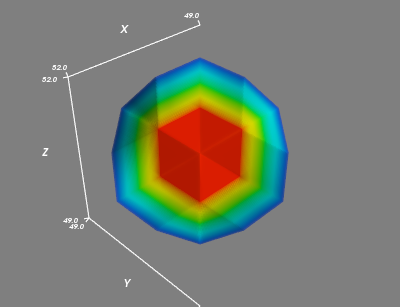
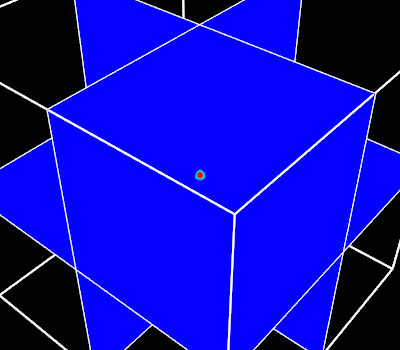

### l = 1
#### m = 0:
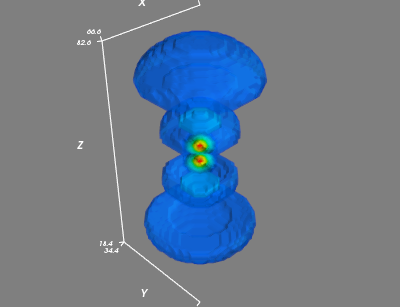
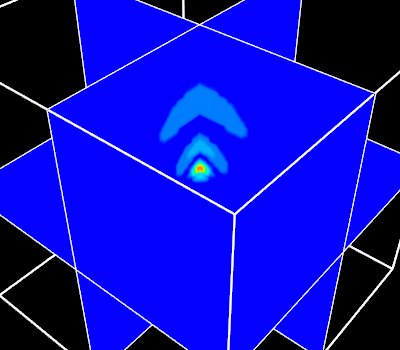

#### m = 1:
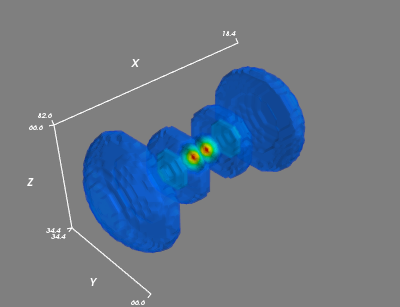
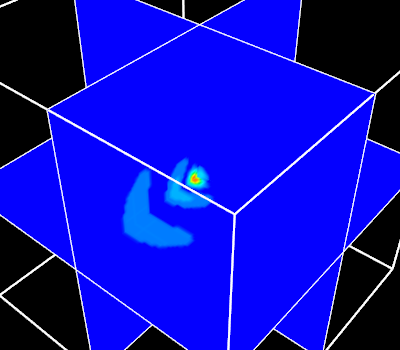

#### m = -1:
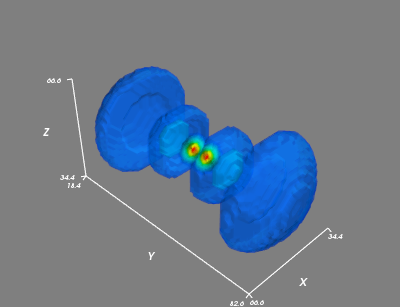
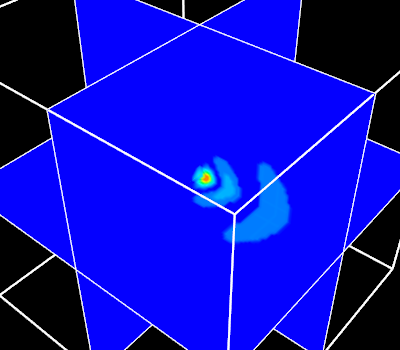

### l = 2
#### m = 0:
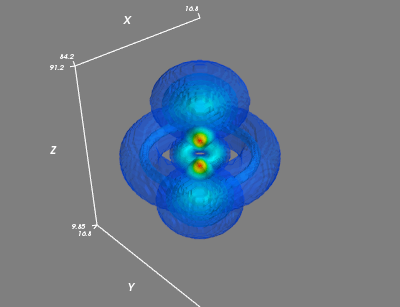
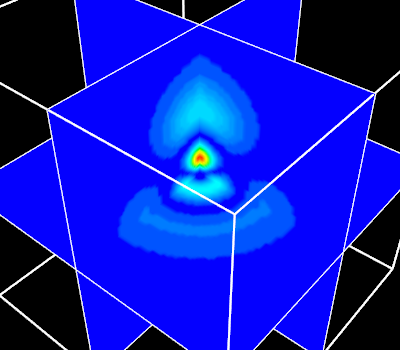

#### m = 1:
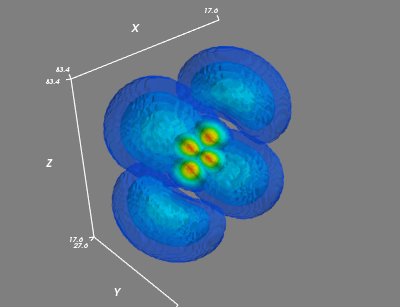
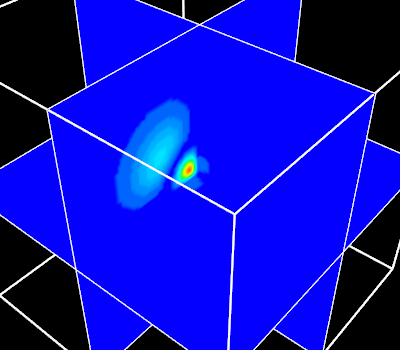

#### m = -1:
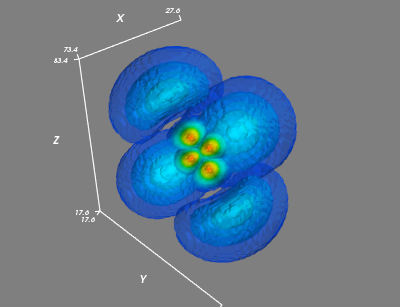
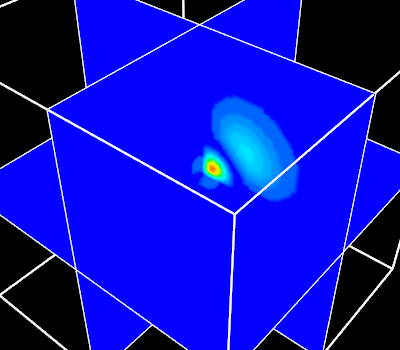

#### m = 2:
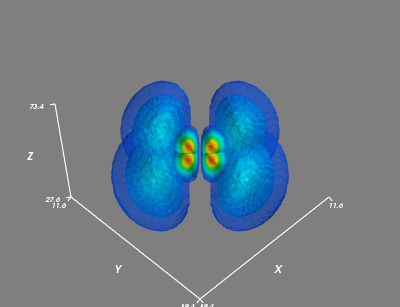
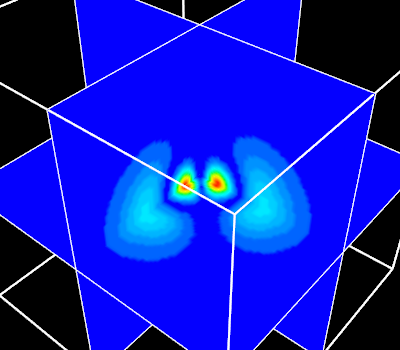

#### m = -2:
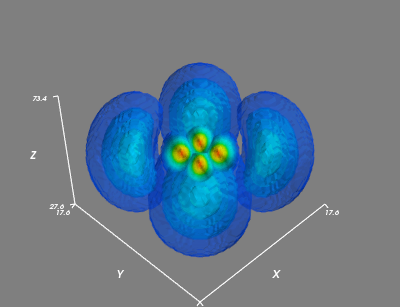
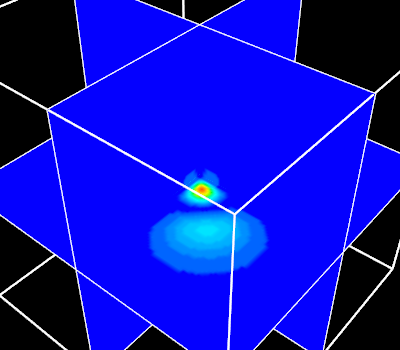

### l = 3
#### m = 0:
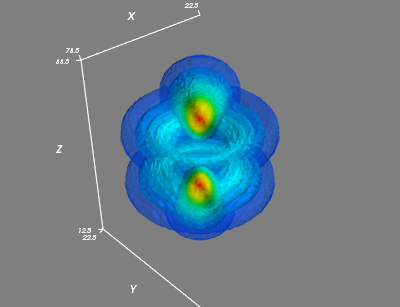
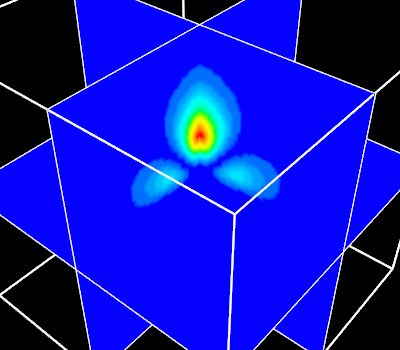

#### m = 1:
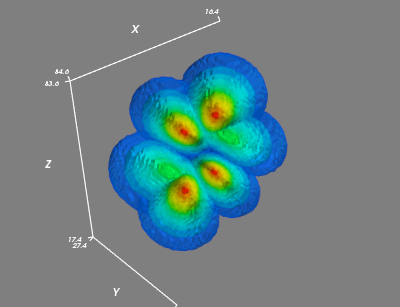
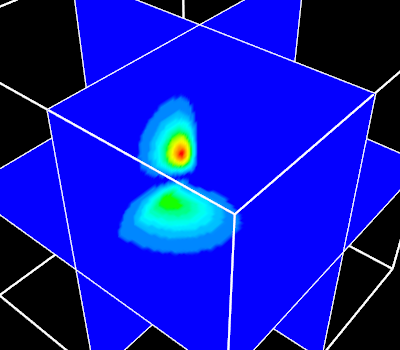

#### m = -1:
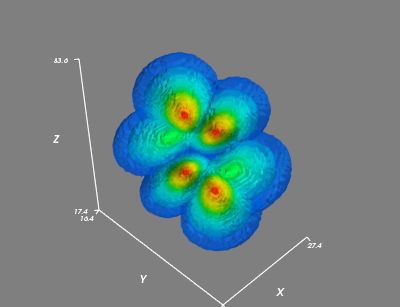
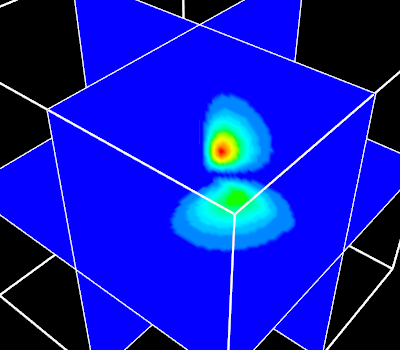

#### m = 2:
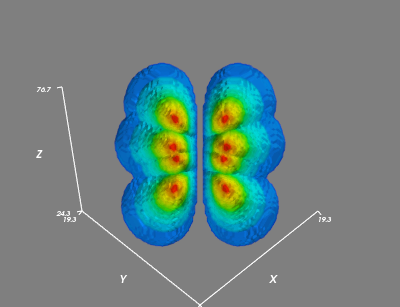
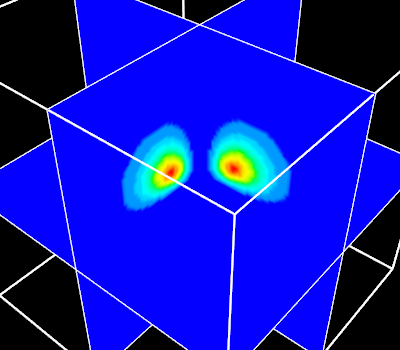

#### m = -2:
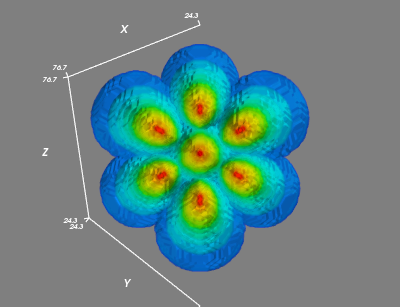
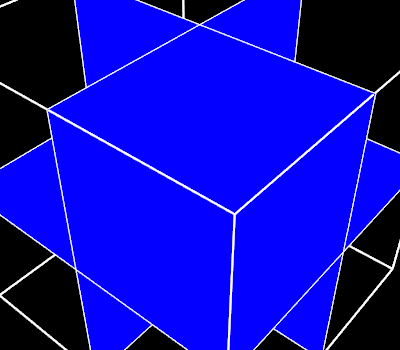

#### m = 3:
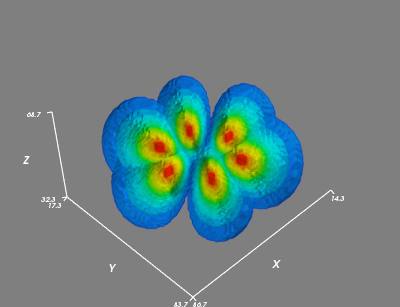
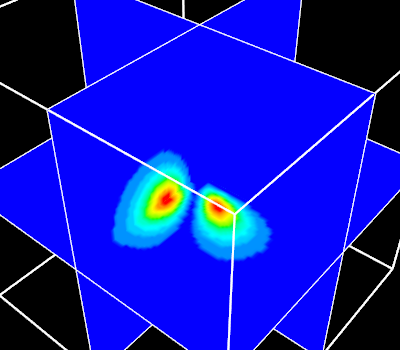

#### m = -3:
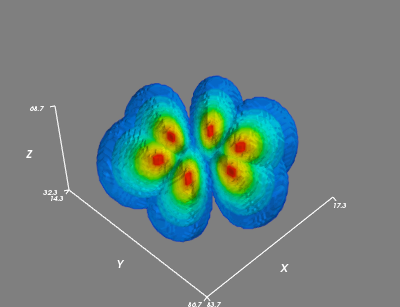
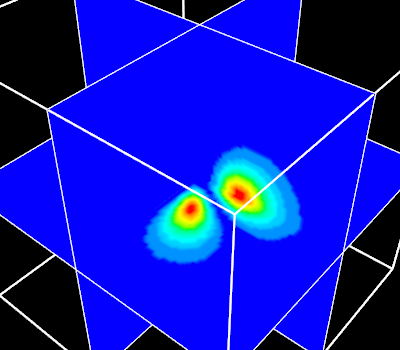

## Plot Submission

Submit your plot for your assigned quantum numbers to your Chemistry instructors to get a point for this item.

## eDimension Questions

Answer the following questions on eDimension Week 10.

Q1: In the final function to calculate the hydrogen wave function, you are to use the other previous functions you have calculated. However, some of those functions rounds the result to 5 decimal places. The error on the final wave function magnitude is called ```____``` due to ```____```.

1. floating point error, rounding error.
2. propagation error, rounding error.
3. propagation error, floating point error.
4. rounding error, propagation error.

A1: 2.

Q2: What is the effect when you increase the number of points $N_x$,$N_y$,$N_z$, while maintaining the values the other parameters?

1. increase of accuracy, decrease of computational time.
2. decrease of accuracy, increase of computational time.
3. increase of accuracy, increase of computational time.
4. decrease of accuracy, decrease of computational time.

A2: 3.

Q3: What is the effect of increasing the distance $r/a$, while maintaining the values
of the other paramters?

1. increase of accuracy, no change in computational time.
2. decrease of accuracy, change in computational time.
3. increase of accuracy, change in computational time.
4. decrease of accuracy, no change in computational time.

A3: 4.

# Example Plots


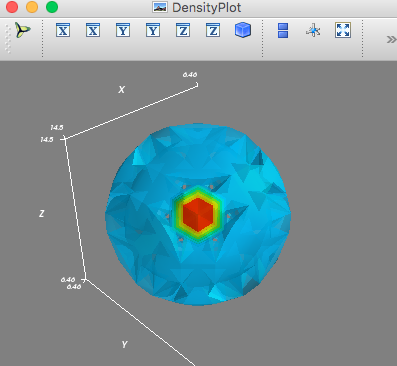
Magnitude plot for n = 2, l = 0, m = 0 using contour3d from mlab Mayavi package.

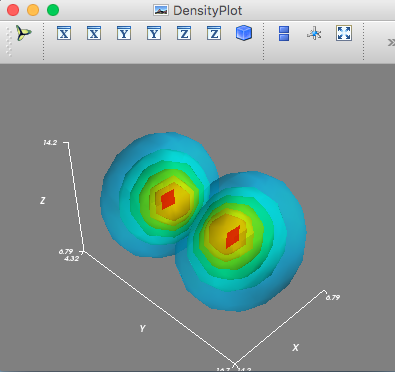
Magnitude plot for n = 2, l = 1, m = 1 using contour3d from mlab Mayavi package.

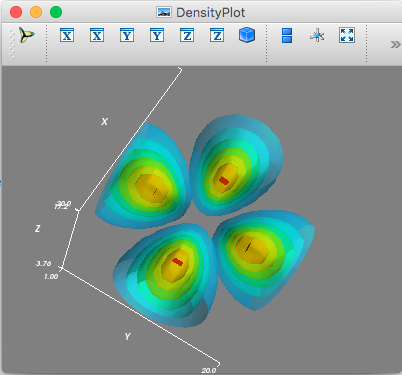
Magnitude plot for n = 3, l = 2, m = 2 using contour3d from mlab Mayavi package.